# Import Required Libraries
Import the necessary libraries, including pandas, numpy, scipy, seaborn, and matplotlib.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Enable inline plotting
%matplotlib inline

# Load and Explore Dataset
Load the dataset and perform initial exploration, including checking for missing values and basic statistics.

Missing values in each column:
 age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Male                    0
gender_Other                   0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64
Basic statistics of the dataset:
                  age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000  

<Figure size 1200x800 with 0 Axes>

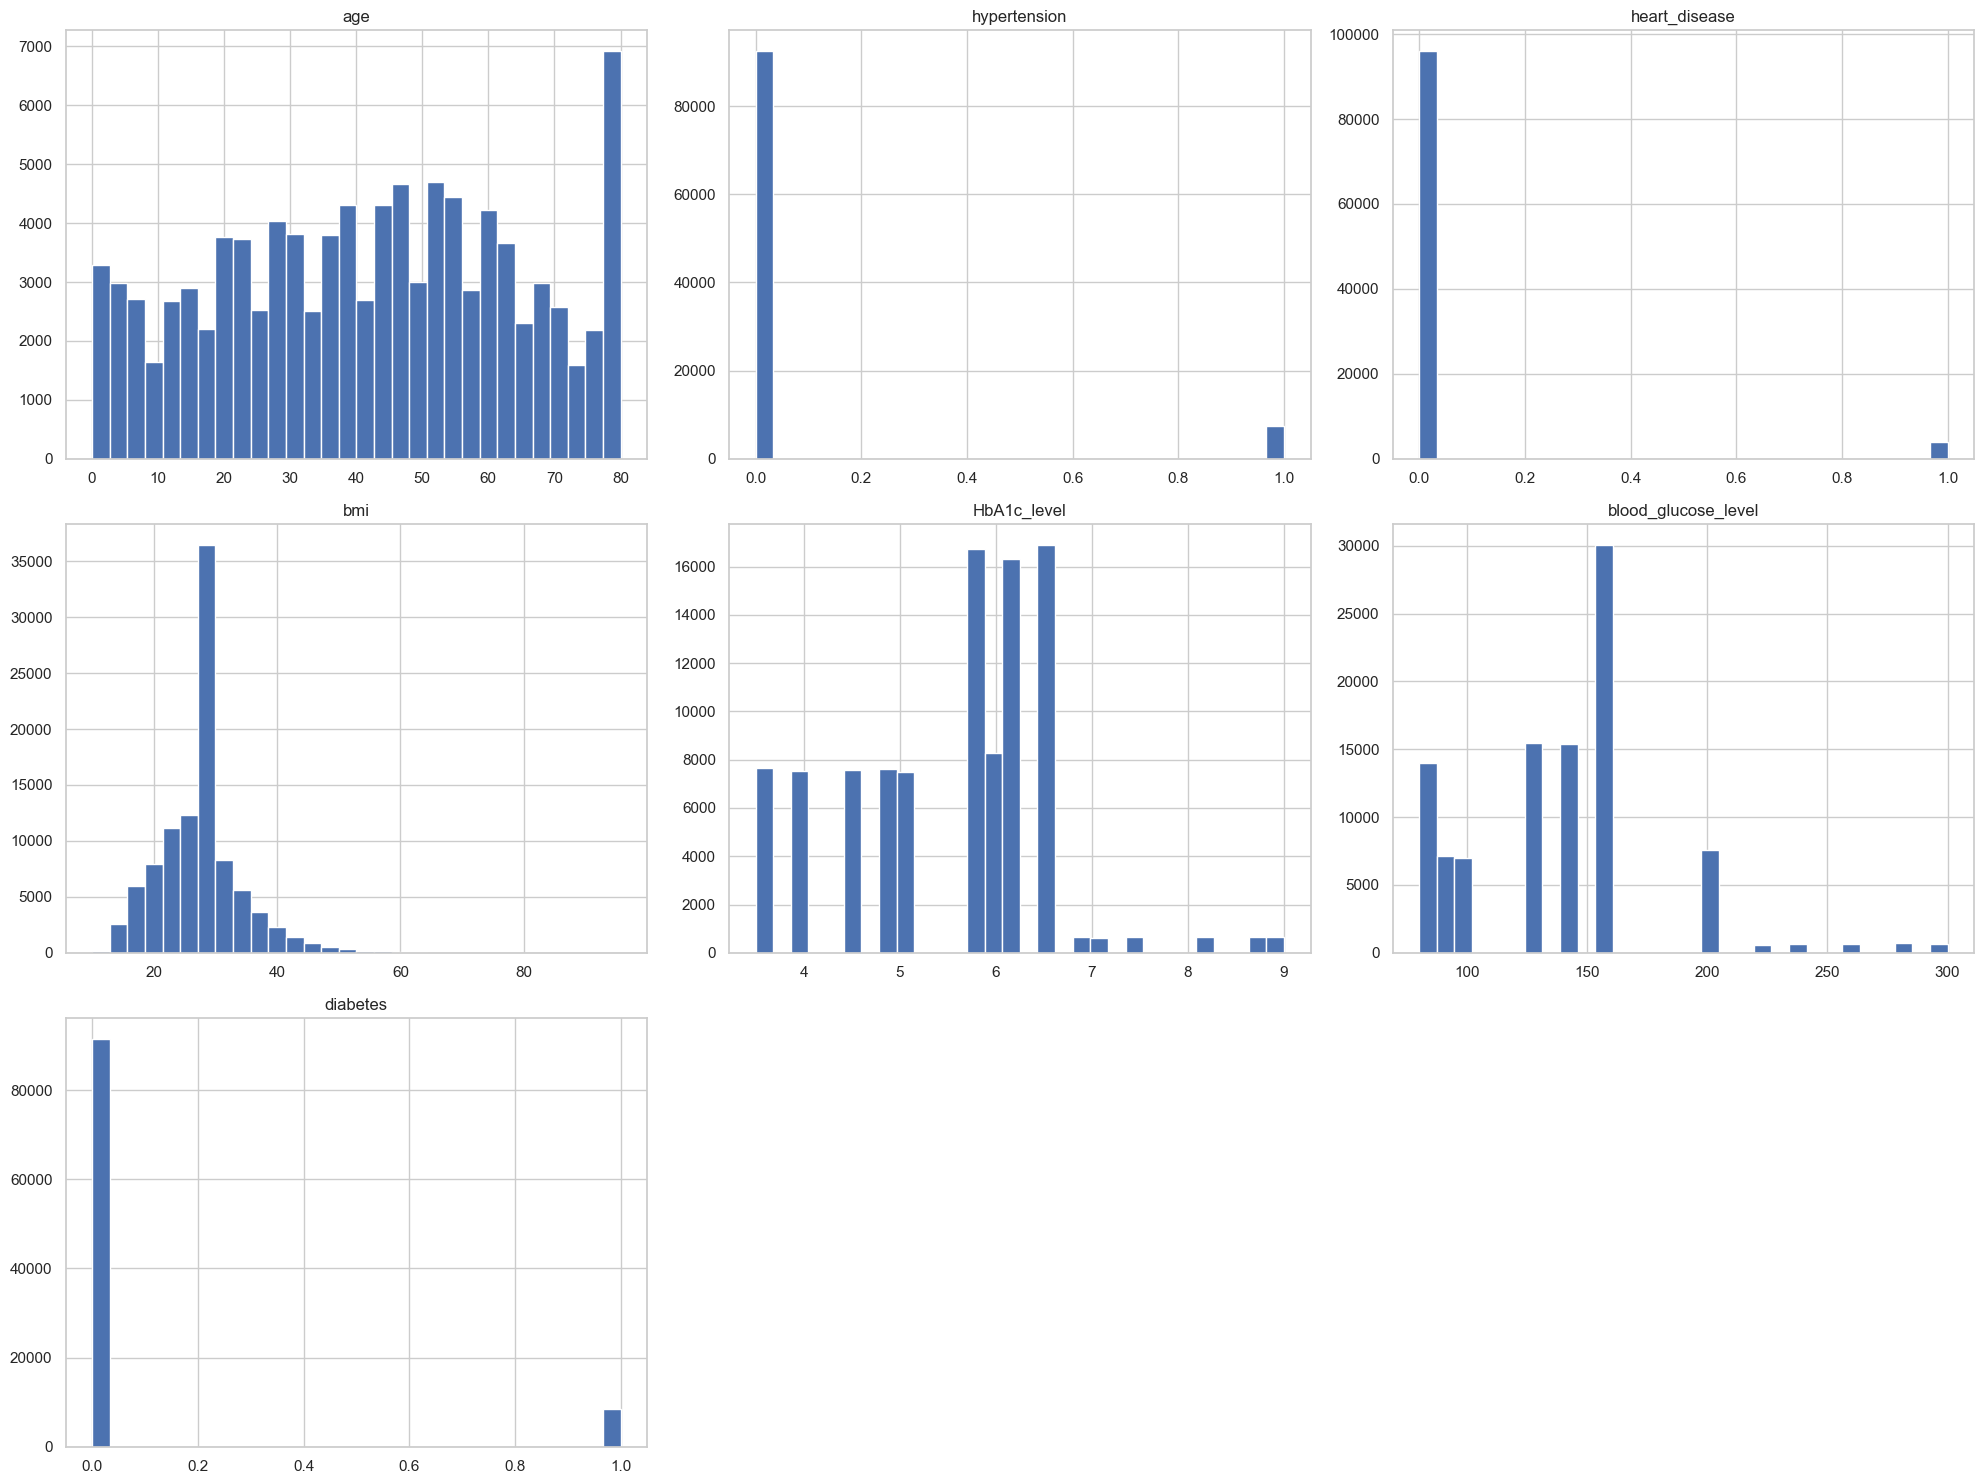

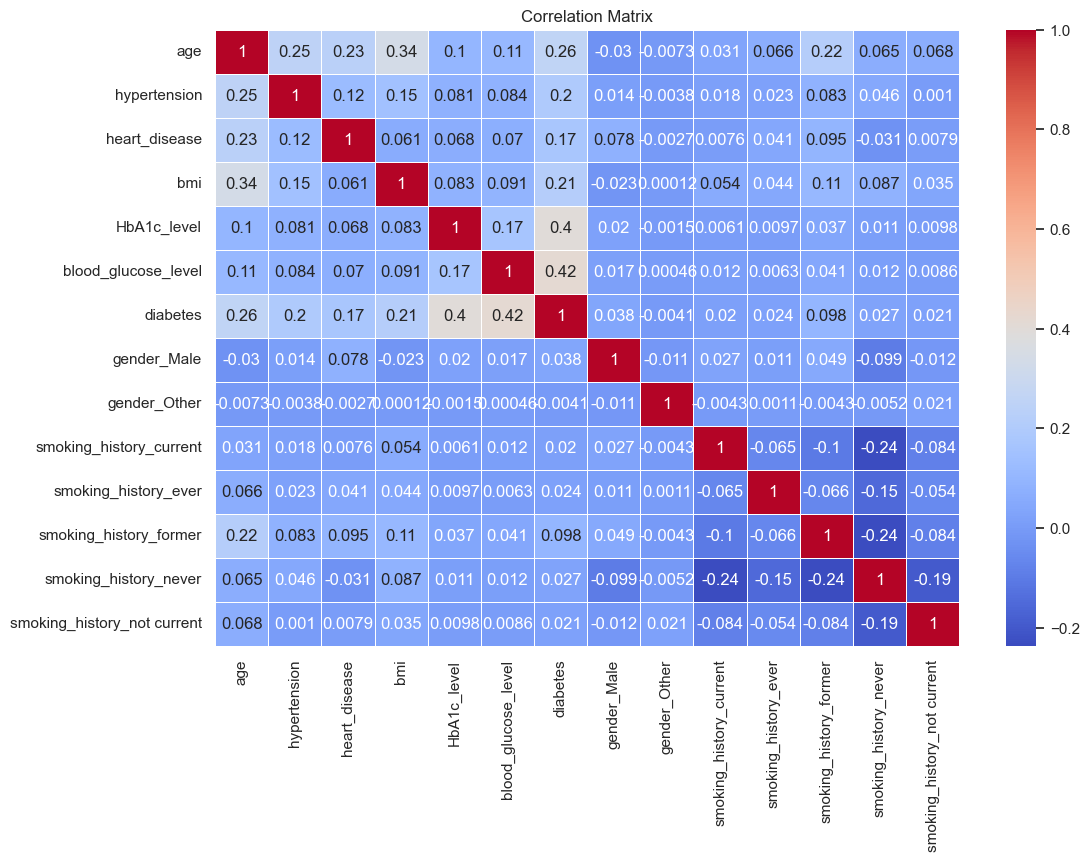

In [4]:
# Load and Explore Dataset

# Load the dataset
df = pd.read_csv('/Users/yujin/Desktop/대학원/Human-AI interaction and data science/HAI5016_Final Presentation/diabetes_prediction_dataset 2.csv')

# Convert categorical variables to numerical values
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the dataset
df.head()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display basic statistics of the dataset
basic_stats = df.describe()
print("Basic statistics of the dataset:\n", basic_stats)

# Plot the distribution of each variable
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Hypothesis 1: Hypertension and Heart Disease vs. Diabetes
Test the hypothesis that higher hypertension and heart disease increase the probability of diabetes.

In [ ]:
# Hypothesis 1: Hypertension and Heart Disease vs. Diabetes

# Ensure the dataframe is prepared
columns = ['hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df = df[columns] if set(columns).issubset(df.columns) else df

# Handle missing values by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Plot the relationship between hypertension, heart disease, and diabetes
plt.figure(figsize=(14, 6))

# Subplot 1: Hypertension vs. Diabetes
plt.subplot(1, 2, 1)
sns.boxplot(x='Outcome', y='hypertension', data=df)
plt.title('hypertension vs. diabetes')
plt.xlabel('Outcome')
plt.ylabel('hypertension')


/var/folders/lb/b9rb0ld91wq_6kh6nf65xrg40000gn/T/ipykernel_18056/1148861095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


ValueError: Could not interpret value `diabetes` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# Subplot 2: Heart Disease vs. Diabetes
plt.subplot(1, 2, 2)
sns.boxplot(x='diabetes', y='heart_disease', data=df)
plt.title('heart_disease vs. diabetes')
plt.xlabel('diabetes')
plt.ylabel('heart_disease')

plt.tight_layout()
plt.show()

# Perform statistical tests
# Test 1: Hypertension vs. Diabetes
hypertension_diabetes = stats.ttest_ind(df[df['Diabetes'] == 1]['Hypertension'], df[df['Diabetes'] == 0]['Hypertension'])
print("Hypertension vs. Diabetes T-test results:", hypertension_diabetes)

# Test 2: Heart Disease vs. Diabetes
heart_disease_diabetes = stats.ttest_ind(df[df['Diabetes'] == 1]['HeartDisease'], df[df['Diabetes'] == 0]['HeartDisease'])
print("Heart Disease vs. Diabetes T-test results:", heart_disease_diabetes)

# Plot the distribution of hypertension and heart disease for diabetic and non-diabetic patients
plt.figure(figsize=(14, 6))

# Subplot 1: Distribution of Hypertension
plt.subplot(1, 2, 1)
sns.histplot(df[df['Diabetes'] == 1]['Hypertension'], color='red', label='Diabetic', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['Diabetes'] == 0]['Hypertension'], color='blue', label='Non-Diabetic', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Density')
plt.legend()

# Subplot 2: Distribution of Heart Disease
plt.subplot(1, 2, 2)
sns.histplot(df[df['Diabetes'] == 1]['HeartDisease'], color='red', label='Diabetic', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['Diabetes'] == 0]['HeartDisease'], color='blue', label='Non-Diabetic', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Data Preparation
Prepare the data by selecting relevant columns and handling missing values.

In [ ]:
# Data Preparation

# Select relevant columns for analysis
columns = ['Hypertension', 'HeartDisease', 'BMI', 'HbA1c_level', 'BloodGlucoseLevel', 'Outcome']
df = df[columns]

# Handle missing values by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print("Missing values in each column after filling:\n", missing_values_after)

# Display the first few rows of the prepared dataset
df.head()

# Statistical Test
Perform a chi-square test of independence to determine if there is a significant association between hypertension, heart disease, and diabetes.

In [ ]:
# Statistical Test

# Perform a chi-square test of independence to determine if there is a significant association between hypertension, heart disease, and diabetes
contingency_table = pd.crosstab(df['Hypertension'], df['Diabetes'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test results for Hypertension vs. Diabetes: chi2 = {chi2}, p-value = {p}")

contingency_table = pd.crosstab(df['HeartDisease'], df['Diabetes'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test results for Heart Disease vs. Diabetes: chi2 = {chi2}, p-value = {p}")

# Visualize the relationship using bar plots
plt.figure(figsize=(14, 6))

# Subplot 1: Hypertension vs. Diabetes
plt.subplot(1, 2, 1)
sns.countplot(x='Hypertension', hue='Diabetes', data=df)
plt.title('Hypertension vs. Diabetes')
plt.xlabel('Hypertension')
plt.ylabel('Count')

# Subplot 2: Heart Disease vs. Diabetes
plt.subplot(1, 2, 2)
sns.countplot(x='HeartDisease', hue='Diabetes', data=df)
plt.title('Heart Disease vs. Diabetes')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Visualization
Create bar plots and heatmaps to visualize the relationship between hypertension, heart disease, and diabetes.

In [ ]:
# Visualization

# Create bar plots and heatmaps to visualize the relationship between hypertension, heart disease, and diabetes

# Bar plots for Hypertension and Heart Disease vs. Diabetes
plt.figure(figsize=(14, 6))

# Subplot 1: Hypertension vs. Diabetes
plt.subplot(1, 2, 1)
sns.barplot(x='Hypertension', y='Diabetes', data=df, ci=None)
plt.title('Hypertension vs. Diabetes')
plt.xlabel('Hypertension')
plt.ylabel('Probability of Diabetes')

# Subplot 2: Heart Disease vs. Diabetes
plt.subplot(1, 2, 2)
sns.barplot(x='HeartDisease', y='Diabetes', data=df, ci=None)
plt.title('Heart Disease vs. Diabetes')
plt.xlabel('Heart Disease')
plt.ylabel('Probability of Diabetes')

plt.tight_layout()
plt.show()

# Heatmaps for correlation between variables
plt.figure(figsize=(14, 6))

# Subplot 1: Correlation Heatmap for Hypertension and Diabetes
plt.subplot(1, 2, 1)
correlation_matrix = df[['Hypertension', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Hypertension and Diabetes')

# Subplot 2: Correlation Heatmap for Heart Disease and Diabetes
plt.subplot(1, 2, 2)
correlation_matrix = df[['HeartDisease', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Heart Disease and Diabetes')

plt.tight_layout()
plt.show()

# Hypothesis 2: BMI, HbA1c level, Blood Glucose Level vs. Diabetes

# Bar plots for BMI, HbA1c level, Blood Glucose Level vs. Diabetes
plt.figure(figsize=(21, 6))

# Subplot 1: BMI vs. Diabetes
plt.subplot(1, 3, 1)
sns.barplot(x='Diabetes', y='BMI', data=df, ci=None)
plt.title('BMI vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

# Subplot 2: HbA1c level vs. Diabetes
plt.subplot(1, 3, 2)
sns.barplot(x='Diabetes', y='HbA1c_level', data=df, ci=None)
plt.title('HbA1c level vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c level')

# Subplot 3: Blood Glucose Level vs. Diabetes
plt.subplot(1, 3, 3)
sns.barplot(x='Diabetes', y='BloodGlucoseLevel', data=df, ci=None)
plt.title('Blood Glucose Level vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()

# Heatmaps for correlation between variables
plt.figure(figsize=(21, 6))

# Subplot 1: Correlation Heatmap for BMI and Diabetes
plt.subplot(1, 3, 1)
correlation_matrix = df[['BMI', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: BMI and Diabetes')

# Subplot 2: Correlation Heatmap for HbA1c level and Diabetes
plt.subplot(1, 3, 2)
correlation_matrix = df[['HbA1c_level', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: HbA1c level and Diabetes')

# Subplot 3: Correlation Heatmap for Blood Glucose Level and Diabetes
plt.subplot(1, 3, 3)
correlation_matrix = df[['BloodGlucoseLevel', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Blood Glucose Level and Diabetes')

plt.tight_layout()
plt.show()

# Hypothesis 2: BMI, HbA1c Level, and Blood Glucose Level vs. Diabetes
Test the hypothesis that higher BMI, HbA1c level, and blood glucose level increase the probability of diabetes.

In [ ]:
# Hypothesis 2: BMI, HbA1c Level, and Blood Glucose Level vs. Diabetes

# Bar plots for BMI, HbA1c level, Blood Glucose Level vs. Diabetes
plt.figure(figsize=(21, 6))

# Subplot 1: BMI vs. Diabetes
plt.subplot(1, 3, 1)
sns.barplot(x='Diabetes', y='BMI', data=df, ci=None)
plt.title('BMI vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

# Subplot 2: HbA1c level vs. Diabetes
plt.subplot(1, 3, 2)
sns.barplot(x='Diabetes', y='HbA1c_level', data=df, ci=None)
plt.title('HbA1c level vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c level')

# Subplot 3: Blood Glucose Level vs. Diabetes
plt.subplot(1, 3, 3)
sns.barplot(x='Diabetes', y='BloodGlucoseLevel', data=df, ci=None)
plt.title('Blood Glucose Level vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()

# Heatmaps for correlation between variables
plt.figure(figsize=(21, 6))

# Subplot 1: Correlation Heatmap for BMI and Diabetes
plt.subplot(1, 3, 1)
correlation_matrix = df[['BMI', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: BMI and Diabetes')

# Subplot 2: Correlation Heatmap for HbA1c level and Diabetes
plt.subplot(1, 3, 2)
correlation_matrix = df[['HbA1c_level', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: HbA1c level and Diabetes')

# Subplot 3: Correlation Heatmap for Blood Glucose Level and Diabetes
plt.subplot(1, 3, 3)
correlation_matrix = df[['BloodGlucoseLevel', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Blood Glucose Level and Diabetes')

plt.tight_layout()
plt.show()

# Perform statistical tests
# Test 1: BMI vs. Diabetes
bmi_diabetes = stats.ttest_ind(df[df['Diabetes'] == 1]['BMI'], df[df['Diabetes'] == 0]['BMI'])
print("BMI vs. Diabetes T-test results:", bmi_diabetes)

# Test 2: HbA1c level vs. Diabetes
hba1c_diabetes = stats.ttest_ind(df[df['Diabetes'] == 1]['HbA1c_level'], df[df['Diabetes'] == 0]['HbA1c_level'])
print("HbA1c level vs. Diabetes T-test results:", hba1c_diabetes)

# Test 3: Blood Glucose Level vs. Diabetes
glucose_diabetes = stats.ttest_ind(df[df['Diabetes'] == 1]['BloodGlucoseLevel'], df[df['Diabetes'] == 0]['BloodGlucoseLevel'])
print("Blood Glucose Level vs. Diabetes T-test results:", glucose_diabetes)

# Plot the distribution of BMI, HbA1c level, and Blood Glucose Level for diabetic and non-diabetic patients
plt.figure(figsize=(21, 6))

# Subplot 1: Distribution of BMI
plt.subplot(1, 3, 1)
sns.histplot(df[df['Diabetes'] == 1]['BMI'], color='red', label='Diabetic', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['Diabetes'] == 0]['BMI'], color='blue', label='Non-Diabetic', kde=True, stat="density", linewidth=0)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()

# Subplot 2: Distribution of HbA1c level
plt.subplot(1, 3, 2)
sns.histplot(df[df['Diabetes'] == 1]['HbA1c_level'], color='red', label='Diabetic', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['Diabetes'] == 0]['HbA1c_level'], color='blue', label='Non-Diabetic', kde=True, stat="density", linewidth=0)
plt.title('Distribution of HbA1c level')
plt.xlabel('HbA1c level')
plt.ylabel('Density')
plt.legend()

# Subplot 3: Distribution of Blood Glucose Level
plt.subplot(1, 3, 3)
sns.histplot(df[df['Diabetes'] == 1]['BloodGlucoseLevel'], color='red', label='Diabetic', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['Diabetes'] == 0]['BloodGlucoseLevel'], color='blue', label='Non-Diabetic', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Data Preparation
Prepare the data by selecting relevant columns and handling missing values.

In [ ]:
# Data Preparation

# Select relevant columns for analysis
columns = ['Hypertension', 'HeartDisease', 'BMI', 'HbA1c_level', 'BloodGlucoseLevel', 'Outcome']
df = df[columns]

# Handle missing values by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print("Missing values in each column after filling:\n", missing_values_after)

# Display the first few rows of the prepared dataset
df.head()

# Statistical Test
Perform logistic regression to determine if there is a significant association between BMI, HbA1c level, blood glucose level, and diabetes.

In [ ]:
# Statistical Test

# Perform logistic regression to determine if there is a significant association between BMI, HbA1c level, blood glucose level, and diabetes
import statsmodels.api as sm

# Define the independent variables (BMI, HbA1c level, Blood Glucose Level)
X = df[['BMI', 'HbA1c_level', 'BloodGlucoseLevel']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (Diabetes)
y = df['Outcome']

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the summary of the logistic regression model
print(logit_model.summary())

# Visualize the coefficients of the logistic regression model
coefficients = logit_model.params
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients.values)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

# Visualization
Create scatter plots and regression plots to visualize the relationship between BMI, HbA1c level, blood glucose level, and diabetes.

In [ ]:
# Visualization

# Create scatter plots and regression plots to visualize the relationship between BMI, HbA1c level, blood glucose level, and diabetes

# Scatter plots with regression lines
plt.figure(figsize=(21, 6))

# Subplot 1: BMI vs. Diabetes
plt.subplot(1, 3, 1)
sns.scatterplot(x='BMI', y='Diabetes', data=df, hue='Diabetes', palette='coolwarm')
sns.regplot(x='BMI', y='Diabetes', data=df, scatter=False, color='blue')
plt.title('BMI vs. Diabetes')
plt.xlabel('BMI')
plt.ylabel('Probability of Diabetes')

# Subplot 2: HbA1c level vs. Diabetes
plt.subplot(1, 3, 2)
sns.scatterplot(x='HbA1c_level', y='Diabetes', data=df, hue='Diabetes', palette='coolwarm')
sns.regplot(x='HbA1c_level', y='Diabetes', data=df, scatter=False, color='blue')
plt.title('HbA1c level vs. Diabetes')
plt.xlabel('HbA1c level')
plt.ylabel('Probability of Diabetes')

# Subplot 3: Blood Glucose Level vs. Diabetes
plt.subplot(1, 3, 3)
sns.scatterplot(x='BloodGlucoseLevel', y='Diabetes', data=df, hue='Diabetes', palette='coolwarm')
sns.regplot(x='BloodGlucoseLevel', y='Diabetes', data=df, scatter=False, color='blue')
plt.title('Blood Glucose Level vs. Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Probability of Diabetes')

plt.tight_layout()
plt.show()